In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

print(torch.version.__version__)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.1+cu113


In [3]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot: xlabel='wt', ylabel='mpg'>

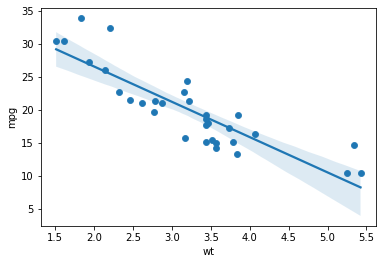

In [4]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [5]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [6]:
w = torch.rand(1, requires_grad=True, dtype=torch.float64)
b = torch.rand(1, requires_grad=True, dtype=torch.float64)

num_epochs = 100
learning_rate = 1e-3
for epoch in range(num_epochs):
  for i in range(len(X)):
    # x, y = torch.tensor(X_list[i]), torch.tensor(y_list[i])
    # forward pass
    y_predict = X[i] * w + b
    # calculate loss
    loss_tensor = torch.pow(y_predict - y[i], 2)
    # backward pass
    loss_tensor.backward()
    # extract losses
    loss_value = loss_tensor.data[0]
    # update weights and biases
    with torch.no_grad():
      w -= w.grad * learning_rate
      b -= b.grad * learning_rate
      w.grad.zero_()
      b.grad.zero_()
  print(loss_value)

tensor(158.8791, dtype=torch.float64)
tensor(81.3485, dtype=torch.float64)
tensor(54.4576, dtype=torch.float64)
tensor(43.8174, dtype=torch.float64)
tensor(39.1532, dtype=torch.float64)
tensor(36.9057, dtype=torch.float64)
tensor(35.6912, dtype=torch.float64)
tensor(34.9321, dtype=torch.float64)
tensor(34.3776, dtype=torch.float64)
tensor(33.9170, dtype=torch.float64)
tensor(33.5006, dtype=torch.float64)
tensor(33.1064, dtype=torch.float64)
tensor(32.7243, dtype=torch.float64)
tensor(32.3497, dtype=torch.float64)
tensor(31.9808, dtype=torch.float64)
tensor(31.6164, dtype=torch.float64)
tensor(31.2563, dtype=torch.float64)
tensor(30.9001, dtype=torch.float64)
tensor(30.5477, dtype=torch.float64)
tensor(30.1991, dtype=torch.float64)
tensor(29.8542, dtype=torch.float64)
tensor(29.5130, dtype=torch.float64)
tensor(29.1753, dtype=torch.float64)
tensor(28.8413, dtype=torch.float64)
tensor(28.5108, dtype=torch.float64)
tensor(28.1838, dtype=torch.float64)
tensor(27.8603, dtype=torch.float64)


In [7]:
print(f"Weight: {w.item()}, Bias: {b.item()}")

Weight: 0.943490879413489, Bias: 15.428732086689287


In [8]:
y_pred = (torch.tensor(X_list)*w+b).detach().numpy()

<AxesSubplot: >

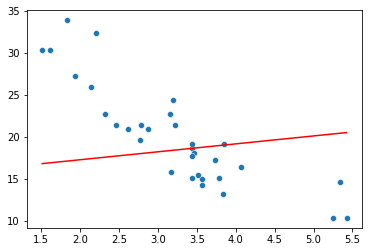

In [9]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")

Slope: [-5.3444715], Bias: 37.285125732421875


In [11]:
#%conda install torchviz

In [12]:
#import torchviz as tv
#print(tv.__version__)

In [13]:
#%pip install --force-reinstall graphviz==0.19.1

In [14]:
#%pip install whych

In [15]:
#from whych import whych
#whych("torchviz")

In [16]:
#import graphviz as gv
#print(gv.__version__)

In [17]:
#%pip list

In [18]:
#import sys
#sys.executable

In [19]:
#from platform import python_version
#print(python_version())

In [20]:
#%conda install -c fastchan python-graphviz

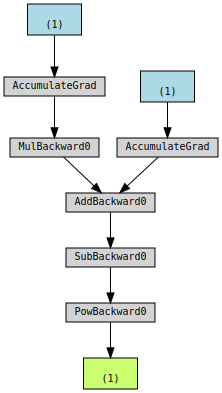

In [21]:
#import os
from torchviz import make_dot
#os.environ['PATH'] += os.pathsep + '/opt/conda/lib/dot'
make_dot(loss_tensor)